In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv("/Users/lucazosso/Desktop/IE_Course/Term_2/Machine Learning II/Group Assignement/data/testing/data_processed_cleaned.csv", index_col="song_id")
data.head()


,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_EMaj,tone_Emin,tone_F#Maj,tone_F#min,tone_FMaj,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin
song_id,,,,,,,,,,,,,,,,,,,,,
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0,0,0,0,0
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,0,0,0,0,0
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,0,0,0,0,0,1,0
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,0,0,0,0,0
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data.dtypes

artist_popularity                 int64
track_age_2024                    int64
danceability                    float64
energy                          float64
loudness                          int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
duration_ms                       int64
track_popularity                  int64
song_popularity_labels           object
genre_country                     int64
genre_folk                        int64
genre_hip_hop_rap                 int64
genre_house_and_pop_fusion        int64
genre_jazz                        int64
genre_latin                       int64
genre_metal                       int64
genre_other                       int64
genre_pop                         int64
genre_reggae                      int64
genre_rnb_soul                    int64


In [6]:
df = data.copy()
df.head()

,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_EMaj,tone_Emin,tone_F#Maj,tone_F#min,tone_FMaj,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin
song_id,,,,,,,,,,,,,,,,,,,,,
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0,0,0,0,0
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,0,0,0,0,0
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,0,0,0,0,0,1,0
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,0,0,0,0,0
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,0,0,0,0,0,1,0,0


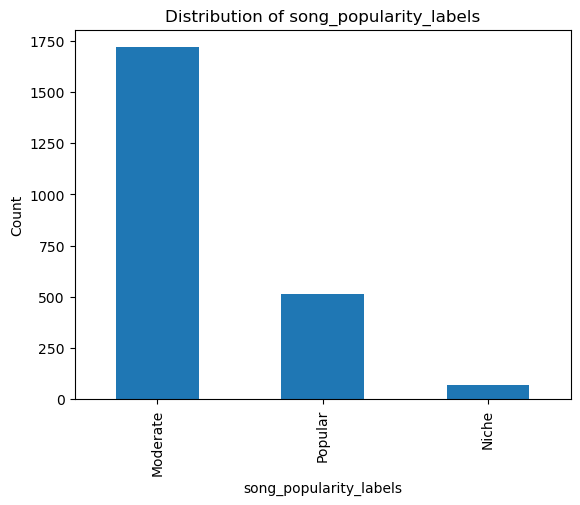

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is already defined
df['song_popularity_labels'].value_counts().plot(kind='bar')

plt.xlabel('song_popularity_labels')
plt.ylabel('Count')
plt.title('Distribution of song_popularity_labels')

plt.show()


song_popularity_labels
Moderate    1202
Popular      359
Niche         48
Name: count, dtype: int64
song_popularity_labels
Moderate    516
Popular     154
Niche        20
Name: count, dtype: int64


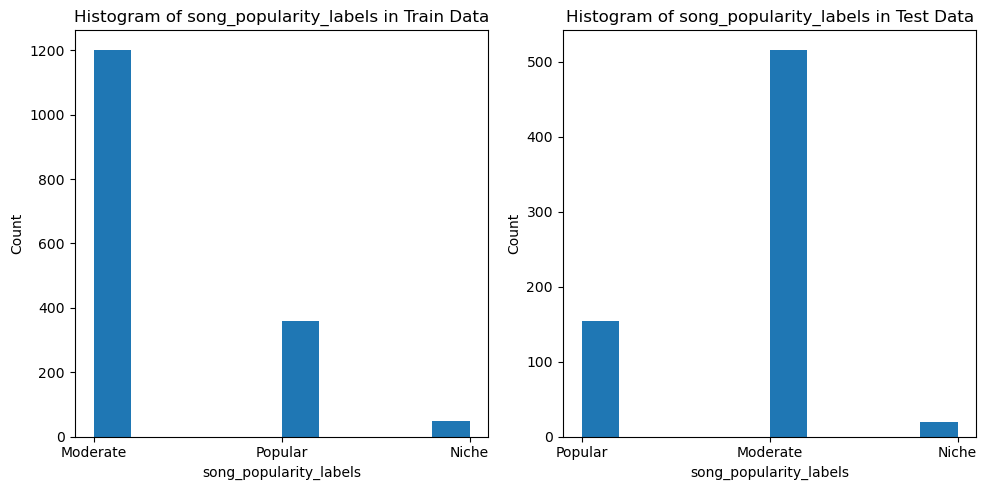

In [8]:
# Stratify Sampling
train, test = train_test_split(data, test_size = 0.3, stratify=data['song_popularity_labels'])
print(train['song_popularity_labels'].value_counts())
print(test['song_popularity_labels'].value_counts())
# Assuming 'train' and 'test' are already defined
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(train['song_popularity_labels'])
plt.xlabel('song_popularity_labels')
plt.ylabel('Count')
plt.title('Histogram of song_popularity_labels in Train Data')

plt.subplot(1, 2, 2)
plt.hist(test['song_popularity_labels'])
plt.xlabel('song_popularity_labels')
plt.ylabel('Count')
plt.title('Histogram of song_popularity_labels in Test Data')

plt.tight_layout()
plt.show()




In [10]:
data.columns

Index(['artist_popularity', 'track_age_2024', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity',
       'song_popularity_labels', 'genre_country', 'genre_folk',
       'genre_hip_hop_rap', 'genre_house_and_pop_fusion', 'genre_jazz',
       'genre_latin', 'genre_metal', 'genre_other', 'genre_pop',
       'genre_reggae', 'genre_rnb_soul', 'genre_rock',
       'genre_singer-songwriter', 'genre_underground_electronic', 'tone_A#min',
       'tone_AMaj', 'tone_Amin', 'tone_BMaj', 'tone_Bmin', 'tone_C#Maj',
       'tone_C#min', 'tone_CMaj', 'tone_Cmin', 'tone_D#Maj', 'tone_D#min',
       'tone_DMaj', 'tone_Dmin', 'tone_EMaj', 'tone_Emin', 'tone_F#Maj',
       'tone_F#min', 'tone_FMaj', 'tone_Fmin', 'tone_G#Maj', 'tone_G#min',
       'tone_GMaj', 'tone_Gmin'],
      dtype='object')

# Logistic Regression without SMOTE

In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

#features = ['artist_popularity', 'track_age_2024', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
features = ['track_age_2024', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre_country', 'genre_folk',
       'genre_hip_hop_rap', 'genre_house_and_pop_fusion', 'genre_jazz',
       'genre_latin', 'genre_metal', 'genre_other', 'genre_pop',
       'genre_reggae', 'genre_rnb_soul', 'genre_rock',
       'genre_singer-songwriter', 'genre_underground_electronic', 'tone_A#min',
       'tone_AMaj', 'tone_Amin', 'tone_BMaj', 'tone_Bmin', 'tone_C#Maj',
       'tone_C#min', 'tone_CMaj', 'tone_Cmin', 'tone_D#Maj', 'tone_D#min',
       'tone_DMaj', 'tone_Dmin', 'tone_EMaj', 'tone_Emin', 'tone_F#Maj',
       'tone_F#min', 'tone_FMaj', 'tone_Fmin', 'tone_G#Maj', 'tone_G#min',
       'tone_GMaj', 'tone_Gmin']

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(train[features], train['song_popularity_labels'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[features])

/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import classification_report
print(classification_report(test['song_popularity_labels'], preds))

              precision    recall  f1-score   support

    Moderate       0.75      1.00      0.85       516
       Niche       0.00      0.00      0.00        20
     Popular       0.00      0.00      0.00       154

    accuracy                           0.75       690
   macro avg       0.25      0.33      0.28       690
weighted avg       0.56      0.75      0.64       690



/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

# Logit w/ SMOTE

In [104]:
!pip install imbalanced-learn



DEPRECATION: arcgis 2.1.0 has a non-standard dependency specifier keyring>=23.3.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
import numpy as np
from imblearn.over_sampling import SMOTE

# First, find the smallest class size
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(train['song_popularity_labels'])
min_class_size = np.min(np.bincount(encoded_labels))
k_neighbors = max(1, min(3, min_class_size - 1))  # Ensure at least 1

# Applying SMOTE to the training set with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(train[features], train['song_popularity_labels'])

<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='song_pop_labels'>

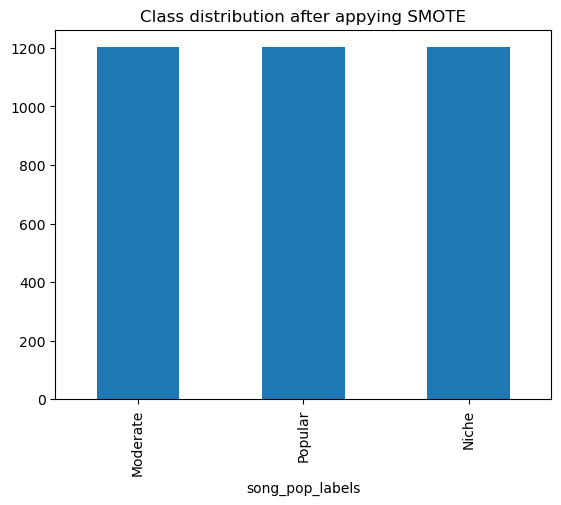

In [14]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='song_pop_labels')


In [15]:
# Instantiate the new Logistic Regression
log_reg_2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds2 = log_reg_2.predict(test[features])


/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(classification_report(test['song_popularity_labels'], preds2))

              precision    recall  f1-score   support

    Moderate       0.87      0.60      0.71       516
       Niche       0.04      0.30      0.07        20
     Popular       0.35      0.42      0.38       154

    accuracy                           0.55       690
   macro avg       0.42      0.44      0.39       690
weighted avg       0.73      0.55      0.62       690



In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test['song_popularity_labels'], preds2)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.5521739130434783


In [18]:
from sklearn.metrics import confusion_matrix
unique_labels = np.unique(test['song_popularity_labels'])
unique_labels
# Assuming 'test', 'preds2', and 'labels' are already defined
cm = confusion_matrix(test['song_popularity_labels'], preds2)
cm_df = pd.DataFrame(cm, index= unique_labels, columns=unique_labels)
cm_df


,Moderate,Niche,Popular
Moderate,311,94,111
Niche,6,6,8
Popular,41,49,64


In [19]:
len(features)

48

# Random Forests

In [20]:
# Instantiate the new Logistic Regression
random_Forest = RandomForestClassifier(n_estimators=200, oob_score=True, max_features=6)

# Fit the model with the data that has been resampled with SMOTE
random_Forest.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
preds_rf = random_Forest.predict(test[features])

In [21]:

accRF=random_Forest.oob_score_
print("Accuracy OOB set Random Forests = {0:.2%}".format(accRF))

Accuracy OOB set Random Forests = 88.46%


In [22]:
from sklearn.metrics import classification_report

print(classification_report(test['song_popularity_labels'], preds_rf))


              precision    recall  f1-score   support

    Moderate       0.82      0.90      0.86       516
       Niche       0.12      0.05      0.07        20
     Popular       0.49      0.38      0.43       154

    accuracy                           0.76       690
   macro avg       0.48      0.44      0.45       690
weighted avg       0.73      0.76      0.74       690



In [23]:
cm_rf = confusion_matrix(test['song_popularity_labels'], preds_rf)
cm_df1 = pd.DataFrame(cm, index= unique_labels, columns=unique_labels)
cm_df1

,Moderate,Niche,Popular
Moderate,311,94,111
Niche,6,6,8
Popular,41,49,64


# XGBOOST

In [24]:
from xgboost import XGBClassifier
# Ensure target variable is encoded properly
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Instantiate the XGBoost classifier
xgb = XGBClassifier(n_estimators=200)

# Fit the model with the data that has been resampled with SMOTE
xgb.fit(X_resampled, y_resampled_encoded)

# Predict on the test set (not resampled to obtain honest evaluation)
preds_xgb = xgb.predict(test[features])

In [25]:
# Transform the true labels to the encoded form
true_labels_encoded = label_encoder.transform(test['song_popularity_labels'])

# Now you can compare true_labels_encoded with preds_xgb
print(classification_report(true_labels_encoded, preds_xgb))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       516
           1       0.17      0.05      0.08        20
           2       0.52      0.39      0.45       154

    accuracy                           0.76       690
   macro avg       0.50      0.45      0.46       690
weighted avg       0.73      0.76      0.74       690

